In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

## PCA to obtain Eigenfaces

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
62*47 #it is M

2914

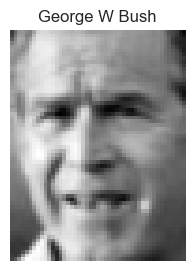

<Figure size 640x480 with 0 Axes>

In [4]:
# show the face images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, faces.images.shape[0], 100):
    I = faces.images[n,:,:].reshape(62,47)   
    ax.imshow(I, cmap='gray')    
    ax.axis('off')
    ax.set_title(faces.target_names[faces.target[n]])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

There are fast method for PCA, such as ``RandomizedPCA`` or ``IncrementalPCA``

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized')
#pca = PCA(n_components=0.75)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

In [6]:
pca.components_.shape

(150, 2914)

Text(0.5, 1.0, 'mean face')

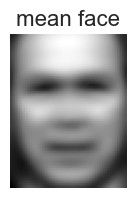

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(3, 2))
ax.imshow(pca.mean_.reshape(62, 47), cmap='gray')
ax.axis('off')
ax.set_title('mean face', fontsize=16)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

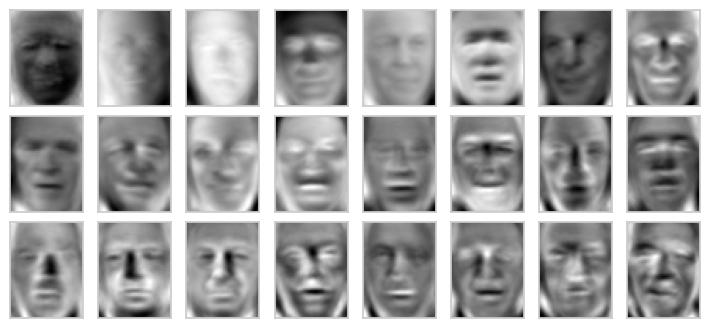

In [8]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='gray')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

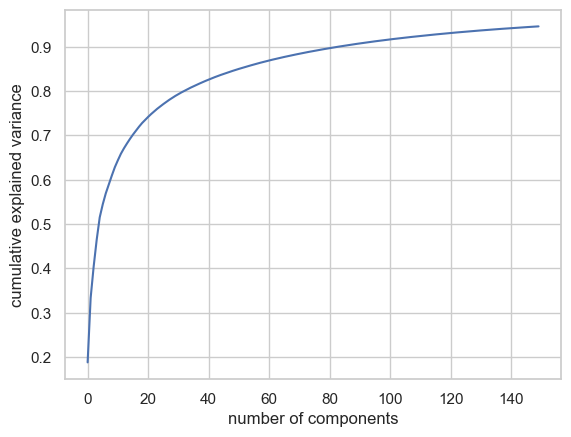

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [10]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

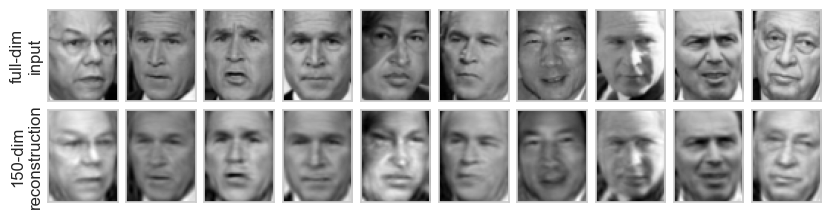

In [11]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the 2914 initial features/pixels.
Although it reduces the dimensionality of the data from 2914-dim to 150-dim, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
The principle components are the new features, better than the raw pixels.

### Use PCA to generate images

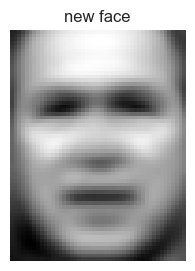

<Figure size 640x480 with 0 Axes>

In [12]:
# use two components
w0=pca.components_[4,:]
w1=pca.components_[5,:]
lamda0=pca.explained_variance_[4]
lamda1=pca.explained_variance_[5]
meanface=pca.mean_
# generate some new face images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    I = meanface + np.random.randn()*np.sqrt(lamda0)*w0 + np.random.randn()*np.sqrt(lamda1)*w1
    I = I.reshape(62,47)  
    ax.imshow(I, cmap='gray')    
    ax.axis('off')
    ax.set_title('new face')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

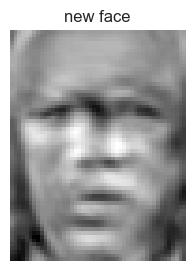

<Figure size 640x480 with 0 Axes>

In [13]:
# use all of the 150 components
W=pca.components_ * np.sqrt(pca.explained_variance_.reshape(150,1))
meanface=pca.mean_
# generate some new face images
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    y = np.random.randn(150,1)
    temp = W*y
    temp = temp.sum(axis=0)
    I = meanface + temp
    I = I.reshape(62,47)  
    ax.imshow(I, cmap='gray')    
    ax.axis('off')
    ax.set_title('new face')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 